
Таблиця пацієнтів із загальною вартістю ліків:


,surname,total_price
0,Brown,65.0
1,Davis,20.0
2,Taylor,9.0


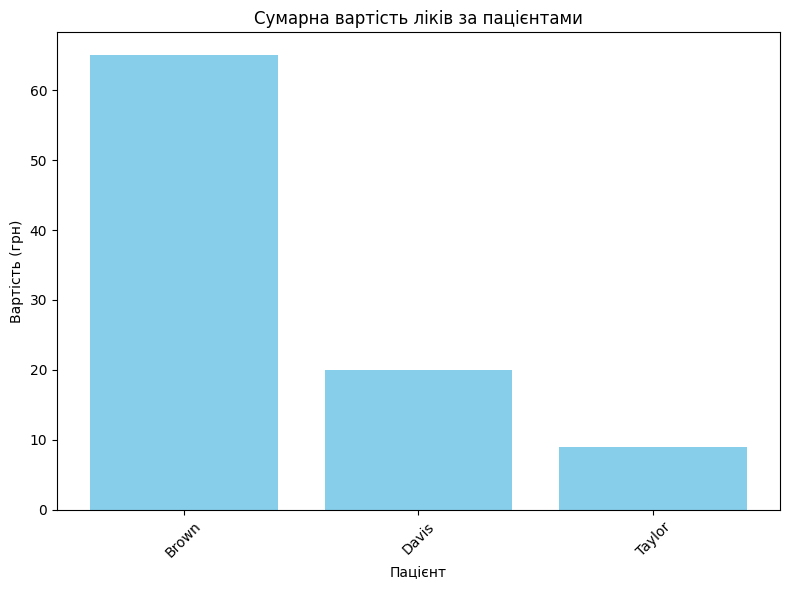

KeyError: 'name'

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt


doctors = pd.read_csv('doctors.csv')
patients = pd.read_csv('patients.csv')
medications = pd.read_csv('medications.csv')
operations = pd.read_csv('operations.csv')

# Обробка віку пацієнтів
patients['birth_date'] = pd.to_datetime(patients['birth_date'])
current_date = pd.to_datetime('2024-12-01')
patients['age'] = (current_date - patients['birth_date']).dt.days // 365
patients['discount'] = patients['age'].apply(lambda x: 0.1 if x < 18 else 0.0)

# 3. Об'єднання таблиць
result = pd.merge(operations, patients, left_on='patient_id', right_on='id_p')
result = pd.merge(result, doctors, left_on='doctor_id', right_on='id_l')
result = pd.merge(result, medications, left_on='medication_id', right_on='id_m')

# Додавання підсумкової вартості з урахуванням знижки
result['total_price'] = result['quantity'] * result['price'] * (1 - result['discount'])

# 4. Табличка: пацієнт, загальна вартість ліків
patient_summary = result.groupby('surname')['total_price'].sum().reset_index()
patient_summary = patient_summary.sort_values(by='total_price', ascending=False)
print("\nТаблиця пацієнтів із загальною вартістю ліків:")
display(patient_summary)

# 5. Діаграма вартості ліків
plt.figure(figsize=(8, 6))
plt.bar(patient_summary['surname'], patient_summary['total_price'], color='skyblue')
plt.title('Сумарна вартість ліків за пацієнтами')
plt.xlabel('Пацієнт')
plt.ylabel('Вартість (грн)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Щоденний відпуск препаратів
daily_summary = result.groupby(['operation_date', 'name'])['quantity'].sum().reset_index()
print("\nЩоденний відпуск препаратів:")
display(daily_summary)


CSV-файли створені успішно.
